In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
%matplotlib inline


In [4]:
df = pd.read_excel('Reserve.xlsx', engine='openpyxl')

In [4]:
db.columns

Index(['Fecha', 'ID', 'Even_mon', 'Especie', 'No_Mod', 'No_Ind', 'Alt1_Ind',
       'Alt2_Ind', 'Alt3_Ind', 'Alt_Ind Promedio', 'DAB1_Ind', 'DAB2_Ind',
       'DAB3_Ind', 'DAB_prom', 'Diam_1_Ind', 'Diam_2_Ind', 'Area_cop_ind',
       'Observaciones_Crec', 'Sup_Ind', 'Est_Fit_Ind', 'Coloracion',
       'Vigor bajo', 'Herbivoria', 'Patogenos', 'Competencia', 'Daño mecanico',
       'Anegamiento', 'Planta no encontrada', 'Daño por Curi', 'Rebrotando',
       'Observaciones_Sup', 'Period planted', 'COOR_ESTE', 'COOR_NORTE'],
      dtype='object')

In [8]:
db[db['Even_mon'] == 'T7'].head()

,Fecha,ID,Even_mon,Especie,No_Mod,No_Ind,Alt1_Ind,Alt2_Ind,Alt3_Ind,Alt_Ind Promedio,...,Competencia,Daño mecanico,Anegamiento,Planta no encontrada,Daño por Curi,Rebrotando,Observaciones_Sup,Period planted,COOR_ESTE,COOR_NORTE
16506,2021-11-08,1,T7,Ceroxylon alpinum,1,1,8.0,NaN,NaN,8.0,...,SI,NaN,NaN,NaN,SI,SI,NaN,T1,NaN,NaN
16507,2021-11-08,2,T7,Ceroxylon alpinum,1,2,9.0,NaN,NaN,9.0,...,SI,NaN,NaN,NaN,SI,SI,NaN,T1,NaN,NaN
16508,2021-11-08,3,T7,Ceroxylon alpinum,1,3,26.0,NaN,NaN,26.0,...,SI,NaN,NaN,NaN,SI,SI,NaN,T1,NaN,NaN
16509,2021-11-08,4,T7,Ceroxylon alpinum,1,4,9.0,NaN,NaN,9.0,...,SI,NaN,NaN,NaN,SI,SI,NaN,T1,NaN,NaN
16510,2021-11-08,5,T7,Ageratina boyacensis,1,5,7.0,NaN,NaN,7.0,...,SI,NaN,NaN,NaN,SI,SI,Sin placa,T5,NaN,NaN


In [18]:
#First append the coordinates to the new data
#Isolate the module:coordinate groups
coords = db[['No_Mod', 'COOR_ESTE', 'COOR_NORTE']]
coords = coords.groupby('No_Mod').first()
coords.reset_index(level=0, inplace=True) 

In [39]:
T7 = db[db['Even_mon'] == 'T7'].merge(coords, how='outer', on='No_Mod')

In [47]:
new = db[db['Even_mon'] != 'T7']
df = pd.concat([new, T7])
df

,Fecha,ID,Even_mon,Especie,No_Mod,No_Ind,Alt1_Ind,Alt2_Ind,Alt3_Ind,Alt_Ind Promedio,...,Daño por Curi,Rebrotando,Observaciones_Sup,Period planted,COOR_ESTE,COOR_NORTE,COOR_ESTE_x,COOR_NORTE_x,COOR_ESTE_y,COOR_NORTE_y
0,2019-12-01,1,T1,Ceroxylon alpinum,1,1,39.0,0.0,0.0,39.0,...,NaN,NaN,NaN,T1,-73.910047,4.793035,NaN,NaN,NaN,NaN
1,2019-12-01,2,T1,Ceroxylon alpinum,1,2,52.0,0.0,0.0,52.0,...,NaN,NaN,NaN,T1,-73.910047,4.793035,NaN,NaN,NaN,NaN
2,2019-12-01,3,T1,Ceroxylon alpinum,1,3,66.0,0.0,0.0,66.0,...,NaN,NaN,NaN,T1,-73.910047,4.793035,NaN,NaN,NaN,NaN
3,2019-12-01,4,T1,Ceroxylon alpinum,1,4,66.0,0.0,0.0,66.0,...,NaN,NaN,NaN,T1,-73.910047,4.793035,NaN,NaN,NaN,NaN
4,2019-12-01,5,T1,Ceroxylon alpinum,1,5,46.0,0.0,0.0,46.0,...,NaN,NaN,NaN,T1,-73.910047,4.793035,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,2021-11-08,2740,T7,Viburnum tinoides,56,2740,100.0,NaN,NaN,100.0,...,NaN,NaN,NaN,T5,-73.910439,4.792561,NaN,NaN,-73.910439,4.792561
2747,2021-11-08,2741,T7,Viburnum tinoides,56,2741,85.0,NaN,NaN,85.0,...,NaN,NaN,NaN,T5,-73.910439,4.792561,NaN,NaN,-73.910439,4.792561
2748,2021-11-08,2742,T7,Viburnum tinoides,56,2742,75.0,NaN,NaN,75.0,...,NaN,NaN,NaN,T5,-73.910439,4.792561,NaN,NaN,-73.910439,4.792561
2749,2021-11-08,2743,T7,Viburnum tinoides,56,2743,105.0,NaN,NaN,105.0,...,NaN,NaN,Tutor,T5,-73.910439,4.792561,NaN,NaN,-73.910439,4.792561


In [10]:
#There was a modification that was made to the original data so this cell just does that whole thing quickly.
Coords = pd.read_excel('Original Data\Coordinates.xlsx', 'Reserve')
select_coords = Coords[Coords['NOMBRE'].str.contains('Arreglo')]
nucs = select_coords['ID_MUEST'].str[5:-2]
select_coords['No_Mod'] = nucs
mask = select_coords.groupby(['No_Mod']).mean()
mask.reset_index(level=0, inplace=True) 
mask['No_Mod'] = mask['No_Mod'].astype('int64')
mask
df = df.merge(mask, how='outer', on='No_Mod')
df.drop(['COOR_ESTE_x', 'COOR_NORTE_x'],axis=1, inplace=True)
df.rename(columns={'COOR_ESTE_x':'COOR_ESTE', 'COOR_NORTE_x':'COOR_NORTE'}, inplace=True)

<ipython-input-10-f64260a3cffb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_coords['No_Mod'] = nucs


In [44]:
writer = pd.ExcelWriter('T7.xlsx', engine='openpyxl')
T7.to_excel(writer, index = False, engine='openpyxl')
writer.save()

In [50]:
df.drop(['COOR_ESTE_x', 'COOR_ESTE_y', 'COOR_NORTE_x', 'COOR_NORTE_y'],axis=1, inplace=True)

In [11]:
writer = pd.ExcelWriter('Reserve.xlsx', engine='openpyxl')
df.to_excel(writer, index = False, engine='openpyxl')
writer.save()

In [27]:
'''START HERE'''

'START HERE'

In [21]:
df.reset_index(drop=True, inplace=True)
#Find instances of the word "curi" (case insensitive) within column "Observaciones_Crec"
Curi2 = df[df['Observaciones_Crec'].str.contains('curi', regex=True, case=False) == True]

In [22]:
Curi2 = Curi2[['ID', 'Even_mon']].reset_index()
Curi2

,index,ID,Even_mon
0,186,40,T4
1,187,41,T4
2,504,64,T5
3,505,65,T5
4,508,68,T5
...,...,...,...
500,16112,2694,T4
501,16379,2716,T4
502,16402,2739,T4
503,16406,2743,T4


In [23]:
items = Curi2['index'].unique()

In [24]:
#Convert col "Daño por Curi" to boolean
df['Daño por Curi'] = df['Daño por Curi'].notna()

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
#Add the values we found in Curi2 to the data column
for item in items.tolist():
    df.iloc[item, df.columns.get_loc('Daño por Curi')] = True
    

In [12]:
Periodos = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
curi_periodos = {}
for tiempo in Periodos:
    curi_periodos[tiempo] = df[df['Even_mon'] == tiempo].groupby(['COOR_ESTE', 'COOR_NORTE'])['Daño por Curi'].sum().reset_index()

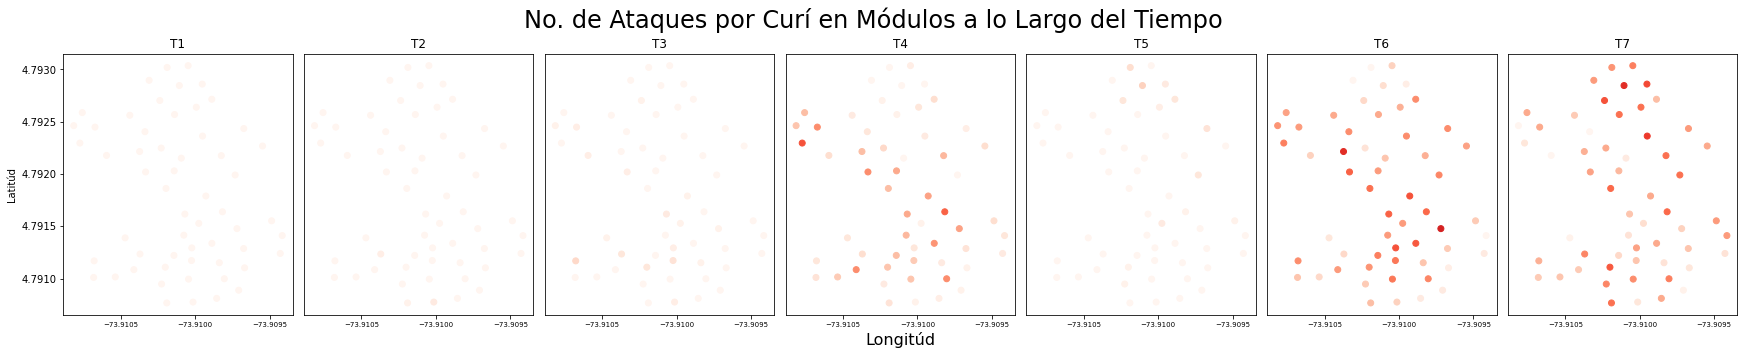

In [13]:
from matplotlib.pyplot import figure



fig, axs = plt.subplots(1,7)
fig.set_figheight(5)
fig.set_figwidth(30)
fig.suptitle('No. de Ataques por Curí en Módulos a lo Largo del Tiempo', fontsize=24)

p = 0
for mapa in curi_periodos:
    data = curi_periodos[mapa]
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'
    
    plot = axs[p].scatter(x=x, y=y, data = data, c=data['Daño por Curi'].array, cmap ='Reds', vmin=0, vmax=46)
    axs[p].set_title(mapa)
    axs[p].ticklabel_format(useOffset=False)
    axs[p].tick_params(axis='x', labelsize=7)
    axs[p].locator_params(axis='x', nbins=6)
    if p != 0:
        axs[p].set_yticks([])
    p += 1

axs[3].set_xlabel('Longitúd', size = 16)
axs[0].set_ylabel('Latitúd')
plt.subplots_adjust(top = 0.85, wspace = 0.05)


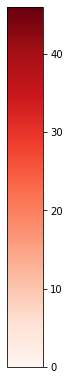

In [14]:
fig = plt.figure(figsize = (1, 5))
ax = fig.add_axes([1, 1, .5, 1])

cmap = mpl.cm.get_cmap('Reds')
norm = mpl.colors.Normalize(vmin=0, vmax=46)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation ='vertical')

In [15]:
#Do the same as above but see if there's preference for newly planted individuals
siembras = ['T3', 'T5', 'T7']
plant_event = {}
for siembra in siembras:
    plant_event[siembra] = df[df['Period planted'] == siembra].groupby(['COOR_ESTE', 'COOR_NORTE'])['Daño por Curi'].sum().reset_index()

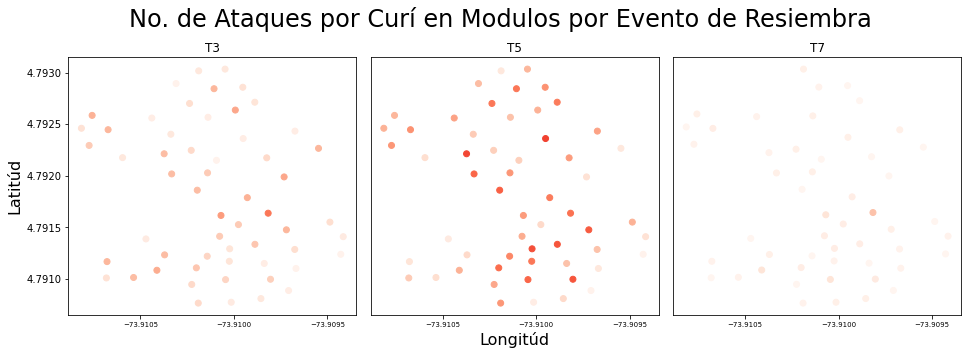

In [16]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(16)
fig.suptitle('No. de Ataques por Curí en Modulos por Evento de Resiembra', fontsize=24)

p = 0
for siembra in plant_event:
    data = plant_event[siembra]
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'
    
    plot = axs[p].scatter(x=x, y=y, data = data, c=data['Daño por Curi'].array, cmap ='Reds', vmin=0, vmax=61)
    axs[p].set_title(siembra)
    axs[p].ticklabel_format(useOffset=False)
    axs[p].tick_params(axis='x', labelsize=7)
    axs[p].locator_params(axis='x', nbins=6)
    if p != 0:
        axs[p].set_yticks([])
    p += 1

axs[1].set_xlabel('Longitúd', size = 16)
axs[0].set_ylabel('Latitúd', size = 16)
plt.subplots_adjust(top = 0.84, wspace = 0.05)


In [17]:
plant_event['T7']['Daño por Curi'].max()

14

In [23]:
nest = {}
for tiempo in Periodos:
    nest[tiempo] = {}
    for siembra in siembras:
        nest[tiempo][siembra] = df[(df['Even_mon'] == tiempo) & (df['Period planted'] == siembra)].groupby(['COOR_ESTE', 'COOR_NORTE'])['Daño por Curi'].sum().reset_index()

In [24]:
nest['T3'].pop('T2')

KeyError: 'T2'

In [25]:
nest['T3']

{'T3':     COOR_ESTE  COOR_NORTE  Daño por Curi
 0  -73.910815    4.792462              0
 1  -73.910774    4.792295              0
 2  -73.910758    4.792586              0
 3  -73.910682    4.791011              0
 4  -73.910678    4.791169              2
 5  -73.910672    4.792448              0
 6  -73.910595    4.792177              0
 7  -73.910536    4.791015              0
 8  -73.910470    4.791389              0
 9  -73.910439    4.792561              0
 10 -73.910411    4.791085              0
 11 -73.910373    4.792214              0
 12 -73.910370    4.791235              0
 13 -73.910337    4.792404              0
 14 -73.910332    4.792019              0
 15 -73.910309    4.792895              0
 16 -73.910237    4.792702              0
 17 -73.910228    4.792248              0
 18 -73.910225    4.790948              0
 19 -73.910200    4.791109              1
 20 -73.910195    4.791861              0
 21 -73.910190    4.790767              0
 22 -73.910188    4.793018  

In [27]:
for time in list(nest):
    for event in list(nest[time]):
        if nest[time][event].empty == True:
            nest[time].pop(event)

In [28]:
#Validate that we have the correct number of collections
for time in nest:
    print(nest[time].keys())

dict_keys([])
dict_keys([])
dict_keys(['T3'])
dict_keys(['T3'])
dict_keys(['T3', 'T5'])
dict_keys(['T3', 'T5'])
dict_keys(['T3', 'T5', 'T7'])


In [29]:
#find the value for vmax

for time in nest:
    for event in nest[time]:
        print(nest[time][event]['Daño por Curi'].max())

2
24
8
2
10
29
12
23
14


In [30]:
#make a series of row/column tuples for the figure
coords = [(0,0), (0,1), (0,2), (1,2), (0,3), (1,3), (0,4), (1,4), (2,4)]

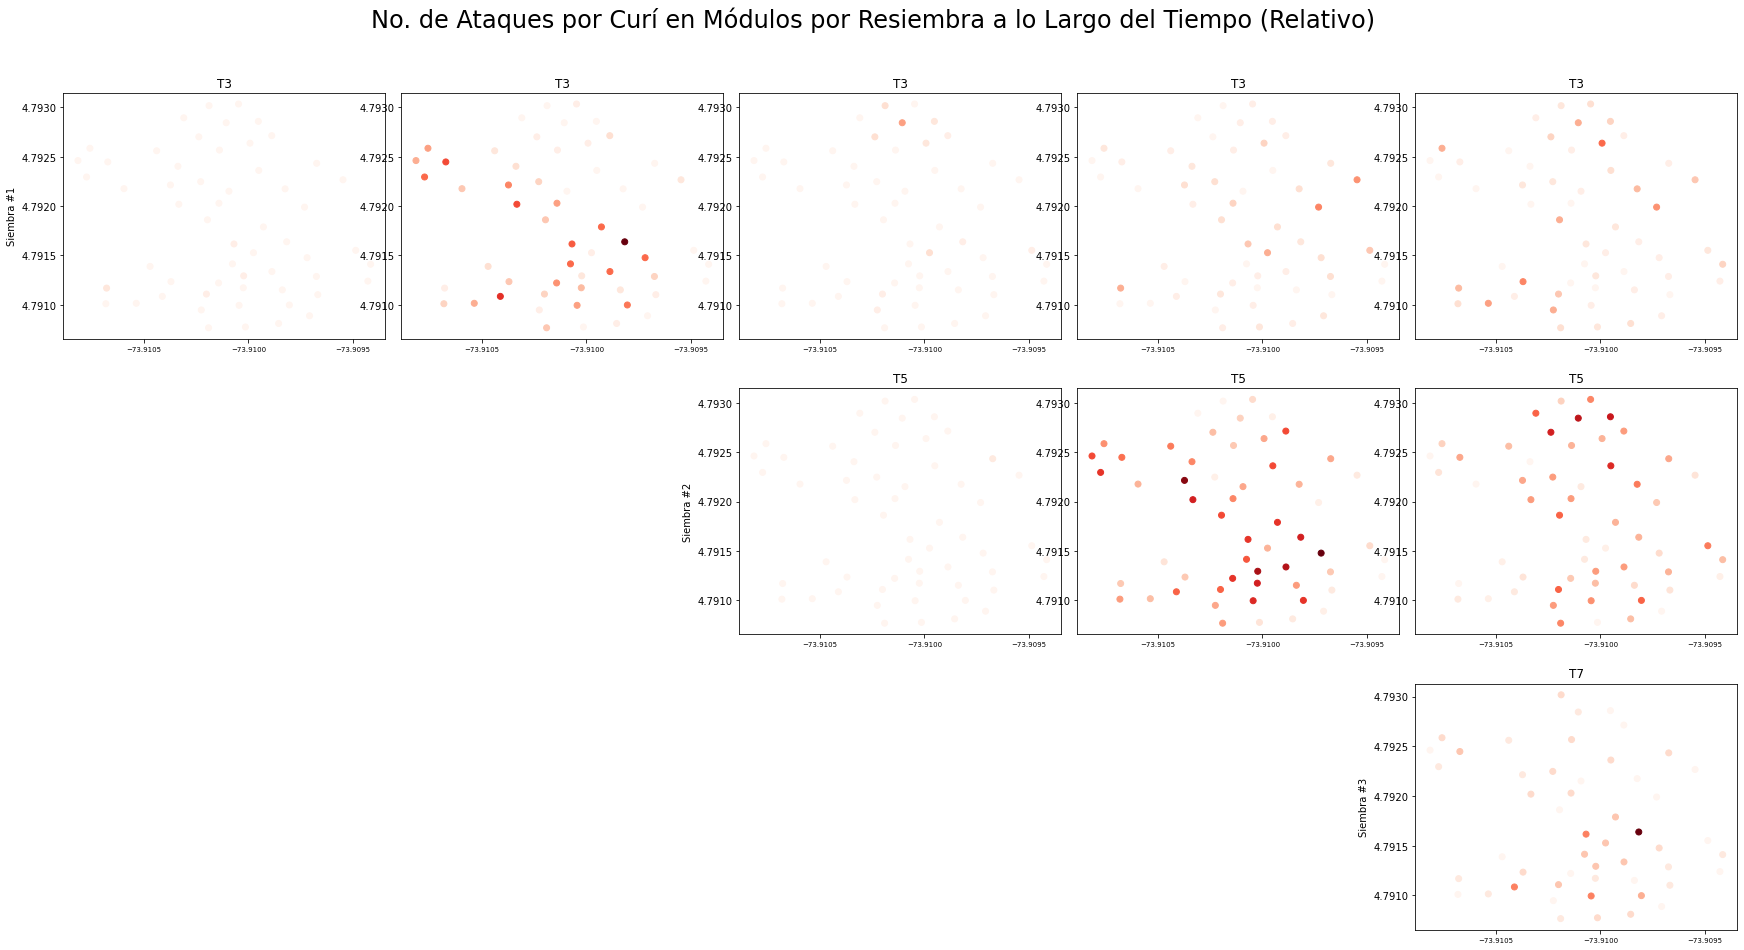

In [87]:
fig, axs = plt.subplots(3,5)
fig.set_figheight(15)
fig.set_figwidth(30)
fig.suptitle('No. de Ataques por Curí en Módulos por Resiembra a lo Largo del Tiempo (Relativo)', fontsize=24)

vmax_dict = {'T3':24,'T5':29,'T7':14}
cc = 0

for time in nest:
    for event in nest[time]:

        data = nest[time][event]
        x = 'COOR_ESTE'
        y = 'COOR_NORTE'

        plot = axs[coords[cc]].scatter(x=x, y=y, data = data, c=data['Daño por Curi'].array, cmap ='Reds', vmin=0, vmax=vmax_dict[event])
        axs[coords[cc]].set_title(event)
        axs[coords[cc]].ticklabel_format(useOffset=False)
        axs[coords[cc]].tick_params(axis='x', labelsize=7)
        axs[coords[cc]].locator_params(axis='x', nbins=6)

        cc += 1

axs[2, 3].set_xlabel('Longitúd', size = 16)
axs[0, 0].set_ylabel('Siembra #1')
axs[1, 2].set_ylabel('Siembra #2')
axs[2, 4].set_ylabel('Siembra #3')
empty = [(1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (2, 3)]
for tup in empty:
    axs[tup].axis('off')
plt.subplots_adjust(top = 0.9, wspace = 0.05)

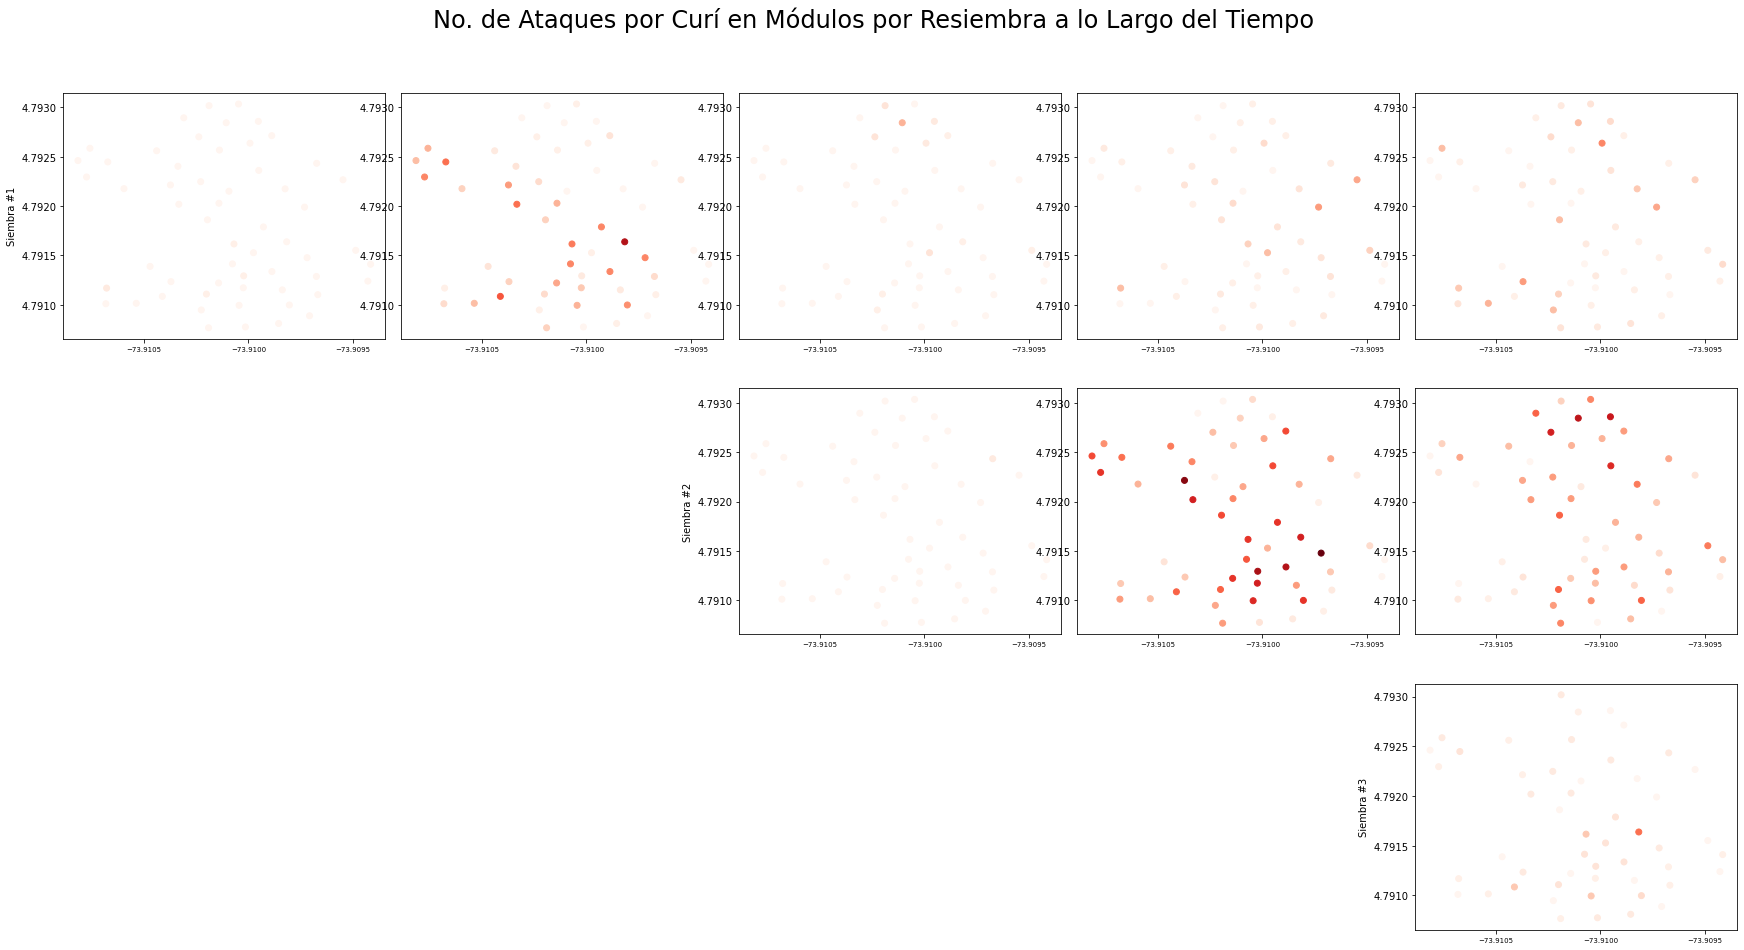

In [88]:
fig, axs = plt.subplots(3,5)
fig.set_figheight(15)
fig.set_figwidth(30)
fig.suptitle('No. de Ataques por Curí en Módulos por Resiembra a lo Largo del Tiempo', fontsize=24)


cc = 0

for time in nest:
    for event in nest[time]:

        data = nest[time][event]
        x = 'COOR_ESTE'
        y = 'COOR_NORTE'

        plot = axs[coords[cc]].scatter(x=x, y=y, data = data, c=data['Daño por Curi'].array, cmap ='Reds', vmin=0, vmax=29)
        axs[coords[cc]].ticklabel_format(useOffset=False)
        axs[coords[cc]].tick_params(axis='x', labelsize=7)
        axs[coords[cc]].locator_params(axis='x', nbins=6)

        cc += 1

axs[2, 3].set_xlabel('Longitúd', size = 16)
axs[0, 0].set_ylabel('Siembra #1')
axs[1, 2].set_ylabel('Siembra #2')
axs[2, 4].set_ylabel('Siembra #3')
for tup in empty:
    axs[tup].axis('off')
plt.subplots_adjust(top = 0.9, wspace = 0.05)

In [69]:
test = df.groupby(['No_Mod', 'COOR_ESTE', 'COOR_NORTE'])['Daño por Curi'].sum().reset_index()

In [34]:
# seems like we consistently have a highest intensity module
test[test['Daño por Curi'] == test['Daño por Curi'].max()]

,No_Mod,COOR_ESTE,COOR_NORTE,Daño por Curi
43,44,-73.909816,4.791638,71


In [36]:
mod_44 = df[df['No_Mod'] == 44][['Even_mon', 'Period planted', 'Especie']]

In [37]:
event_44 = mod_44.groupby(['Even_mon', 'Especie']).count().reset_index()
event_44

,Even_mon,Especie,Period planted
0,T1,Ageratina glyptophlebia,7
1,T1,Escallonia pendula,7
2,T1,Lupinus bogotensis,7
3,T1,Morella pubescens,7
4,T1,Piper nubigenum,7
5,T1,Retrophyllum rospigliosii,7
6,T1,Viburnum tinoides,7
7,T2,Ageratina glyptophlebia,7
8,T2,Escallonia pendula,7
9,T2,Lupinus bogotensis,7


In [38]:
test = mod_44.groupby(['Even_mon', 'Especie']).count().reset_index()

In [39]:
#Create a dataframe assigning unique colors to species names
import matplotlib.colors as mcolors

speciescolor = pd.DataFrame(data={'Species': event_44['Especie'].unique(),})
speciescolor 

,Species
0,Ageratina glyptophlebia
1,Escallonia pendula
2,Lupinus bogotensis
3,Morella pubescens
4,Piper nubigenum
5,Retrophyllum rospigliosii
6,Viburnum tinoides
7,Escallonia paniculata
8,Oreopanax incisus
9,Ageratina boyacensis


In [40]:
for time in Periodos:
    speciescolor[time] = pd.Series([0] * len(speciescolor.index))

In [41]:
#final step to create a dataframe with all the values we want to chart
for time in Periodos:
    current = event_44[event_44['Even_mon'] == time]
    
    for species in current['Especie']:
        row = current.loc[current['Especie'] == species]
        value = row.iloc[0]['Period planted']
        speciescolor[time].loc[speciescolor['Species'] == species] = value
        


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
speciescolor

,Species,T1,T2,T3,T4,T5,T6,T7
0,Ageratina glyptophlebia,7,7,7,7,0,0,0
1,Escallonia pendula,7,7,0,0,1,1,0
2,Lupinus bogotensis,7,7,7,7,9,8,2
3,Morella pubescens,7,7,7,7,5,5,0
4,Piper nubigenum,7,7,1,1,0,0,0
5,Retrophyllum rospigliosii,7,7,7,7,0,0,0
6,Viburnum tinoides,7,7,7,7,5,5,3
7,Escallonia paniculata,0,0,7,7,0,0,0
8,Oreopanax incisus,0,0,6,6,0,0,0
9,Ageratina boyacensis,0,0,0,0,6,6,6


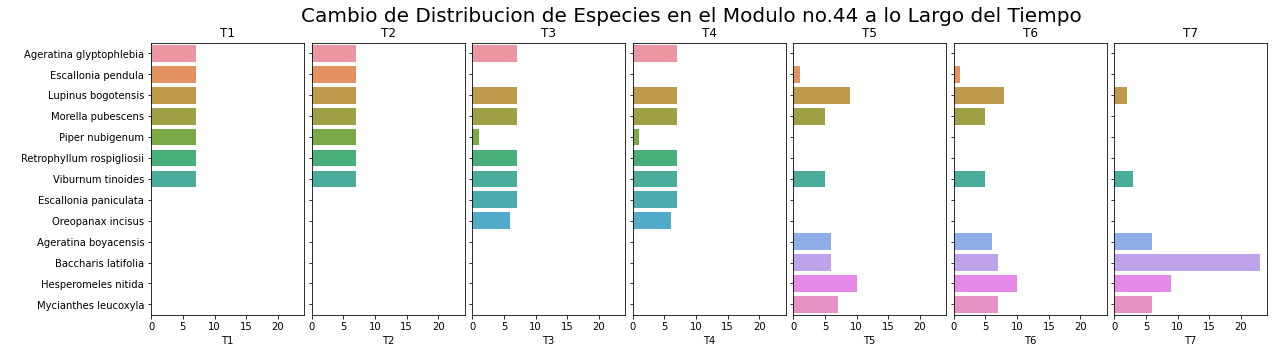

In [43]:
fig, ax = plt.subplots(1,7, sharey=True, sharex=True, figsize=(20,5))

plt.suptitle('Cambio de Distribucion de Especies en el Modulo no.44 a lo Largo del Tiempo', size=20)
base_color = sns.color_palette()[0]
counter = 0
for time in Periodos:
    sns.barplot(ax = ax[counter], data=speciescolor[['Species', time]], y='Species', x=time)
    ax[counter].set_title(event)
    ax[counter].set_ylabel(' ')
    ax[counter].set_title(time)
    counter += 1
plt.subplots_adjust(wspace = 0.05)


In [44]:
#TIME FOR FREEZING
#Find instances of the word "helada" (case and word insensitive) within column "Observaciones_Crec" and "Observaciones_Sup"
froz1 = df[df['Observaciones_Crec'].str.contains('helada', regex=True, case=False) == True]
froz2 = df[df['Even_mon'] == 'T7'][df['Observaciones_Sup'].str.contains('af', regex=True, case=False) == True]
froz3 = pd.concat([froz1, froz2]).reset_index()

<ipython-input-44-4c4a6390b171>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  froz2 = df[df['Even_mon'] == 'T7'][df['Observaciones_Sup'].str.contains('af', regex=True, case=False) == True]


In [45]:
df['Helada'] = np.nan

In [46]:
#Add these values to a new column in df. Remember to save.
for item in froz3['index'].tolist():
    df.iloc[item, df.columns.get_loc('Helada')] = True

In [47]:
heladas = df.groupby(['COOR_ESTE', 'COOR_NORTE'])['Helada'].sum().reset_index()

<AxesSubplot:title={'center':'Ubicacion de Casos de Plantas Afectadas por Heladas (Total)'}, xlabel='True', ylabel='COOR_NORTE'>

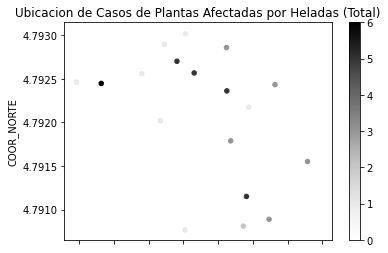

In [48]:
title='Ubicacion de Casos de Plantas Afectadas por Heladas (Total)'
heladas.plot(kind='scatter', x='COOR_ESTE', y='COOR_NORTE', xlabel = True, c=heladas['Helada'].array, colorbar=True, title=title)

In [49]:
top5_group = df.groupby('Especie')[['Daño por Curi', 'Helada']].count()

In [50]:
especies_curi = top5_group['Daño por Curi'].sort_values(ascending=False).head(10)

In [51]:
especies_helada = top5_group['Helada'].sort_values(ascending=False).head(10)

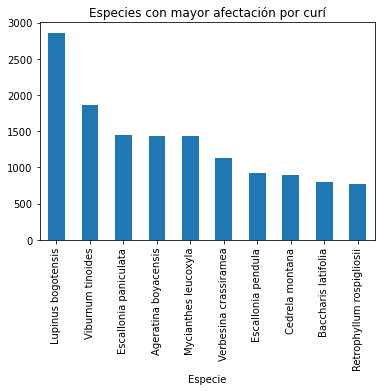

In [52]:
especies_curi.plot(kind='bar')
plt.title('Especies con mayor afectación por curí');

Text(0.5, 1.0, 'Especies con mayor afectación por heladas')

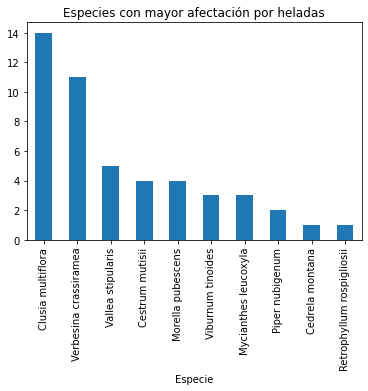

In [53]:
especies_helada.plot(kind='bar')
plt.title('Especies con mayor afectación por heladas')

In [54]:
og_plant_survival = df[df['Period planted'] == 'T1'].groupby(['Even_mon', 'No_Mod', 'COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()



In [55]:
og_plant_survival

,Even_mon,No_Mod,COOR_ESTE,COOR_NORTE,Sup_Ind
0,T1,1,-73.910047,4.793035,49
1,T1,2,-73.910188,4.793018,46
2,T1,3,-73.910309,4.792895,49
3,T1,4,-73.910237,4.792702,47
4,T1,5,-73.910106,4.792845,46
...,...,...,...,...,...
390,T7,53,-73.910672,4.792448,8
391,T7,54,-73.910815,4.792462,3
392,T7,55,-73.910758,4.792586,5
393,T7,56,-73.910439,4.792561,6


In [56]:
total_og = og_plant_survival.groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()

Text(0.5, 1.0, 'Modulos con mayor supervivencia de la siembra original')

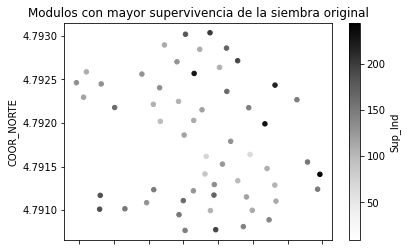

In [57]:
total_og.plot(kind='scatter', x='COOR_ESTE', y='COOR_NORTE', c='Sup_Ind')
plt.title('Modulos con mayor supervivencia de la siembra original')

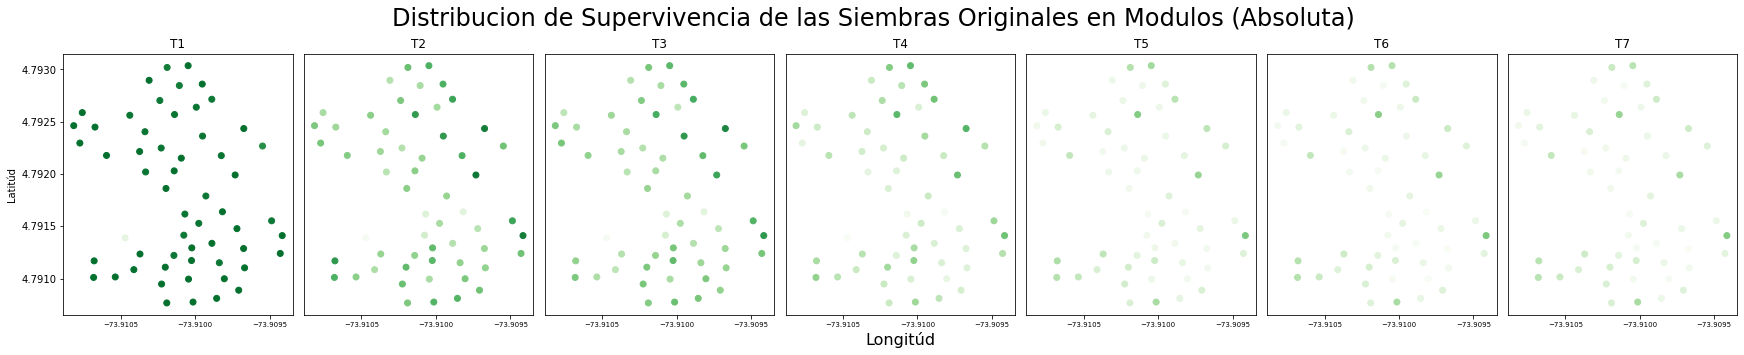

In [66]:
fig, axs = plt.subplots(1,7)
fig.set_figheight(5)
fig.set_figwidth(30)
fig.suptitle('Distribucion de Supervivencia de las Siembras Originales en Modulos (Absoluta)', fontsize=24)

p = 0
for evento in Periodos:
    data = og_plant_survival[og_plant_survival['Even_mon']==evento]
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'
    
    plot = axs[p].scatter(x=x, y=y, data = data, c=data['Sup_Ind'].array, cmap ='Greens', vmin=0, vmax=57)
    axs[p].set_title(evento)
    axs[p].ticklabel_format(useOffset=False)
    axs[p].tick_params(axis='x', labelsize=7)
    axs[p].locator_params(axis='x', nbins=6)
    if p != 0:
        axs[p].set_yticks([])
    p += 1

axs[3].set_xlabel('Longitúd', size = 16)
axs[0].set_ylabel('Latitúd')
plt.subplots_adjust(top = 0.85, wspace = 0.05)

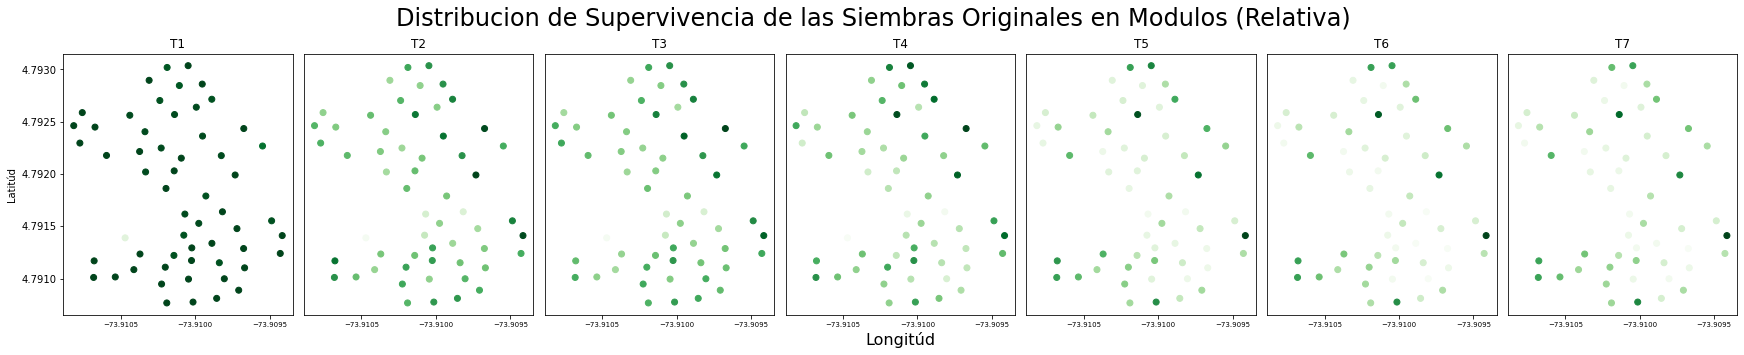

In [67]:
fig, axs = plt.subplots(1,7)
fig.set_figheight(5)
fig.set_figwidth(30)
fig.suptitle('Distribucion de Supervivencia de las Siembras Originales en Modulos (Relativa)', fontsize=24)

p = 0
for evento in Periodos:
    data = og_plant_survival[og_plant_survival['Even_mon']==evento]
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'
    
    plot = axs[p].scatter(x=x, y=y, data = data, c=data['Sup_Ind'].array, cmap ='Greens', vmin=0)
    axs[p].set_title(evento)
    axs[p].ticklabel_format(useOffset=False)
    axs[p].tick_params(axis='x', labelsize=7)
    axs[p].locator_params(axis='x', nbins=6)
    if p != 0:
        axs[p].set_yticks([])
    p += 1

axs[3].set_xlabel('Longitúd', size = 16)
axs[0].set_ylabel('Latitúd')
plt.subplots_adjust(top = 0.85, wspace = 0.05)

In [59]:
#Modules with greatest survivability of original plants
for event in Periodos:
    print(og_plant_survival[og_plant_survival['Even_mon']==event][['No_Mod', 'Sup_Ind']].sort_values(by=['Sup_Ind'], ascending=False).head())

    No_Mod  Sup_Ind
0        1       49
38      39       49
26      27       49
27      28       49
29      30       49
    No_Mod  Sup_Ind
70      14       47
72      16       46
67      11       46
89      33       40
66      10       40
     No_Mod  Sup_Ind
124      11       44
129      16       40
123      10       40
127      14       37
120       7       35
     No_Mod  Sup_Ind
181      11       33
179       9       32
171       1       31
184      14       30
177       7       29
     No_Mod  Sup_Ind
243      16       27
236       9       26
241      14       23
228       1       21
247      20       20
     No_Mod  Sup_Ind
299      16       27
292       9       25
297      14       23
303      20       20
284       1       18
     No_Mod  Sup_Ind
355      16       26
348       9       23
359      20       20
353      14       20
340       1       17


In [61]:
og_plant_survival[og_plant_survival['No_Mod']==16]

,Even_mon,No_Mod,COOR_ESTE,COOR_NORTE,Sup_Ind
15,T1,16,-73.909415,4.791411,49
72,T2,16,-73.909415,4.791411,46
129,T3,16,-73.909415,4.791411,40
186,T4,16,-73.909415,4.791411,29
243,T5,16,-73.909415,4.791411,27
299,T6,16,-73.909415,4.791411,27
355,T7,16,-73.909415,4.791411,26


In [63]:
quants = ['Alt_Ind Promedio', 'DAB_prom', 'Area_cop_ind', 'Sup_Ind', 'Est_Fit_Ind']
species_stats = df.groupby('Especie')[quants].mean().reset_index()

In [89]:
for quant in quants:
    print(species_stats[['Especie', quant]].sort_values(by=quant, ascending=False).head(10))

                    Especie  Alt_Ind Promedio
17       Lupinus bogotensis        122.893339
27    Verbesina crassiramea        108.594990
25      Tibouchina lepidota         92.871283
19     Mycianthes leucoxyla         87.843069
28        Viburnum tinoides         83.641991
4       Baccharis latifolia         83.412297
14      Hesperomeles nitida         76.627166
1      Ageratina boyacensis         70.826449
11    Escallonia paniculata         67.178917
13  Hesperomeles goudotiana         66.144262
                  Especie   DAB_prom
27  Verbesina crassiramea  17.641939
8         Cestrum mutisii   9.582862
17     Lupinus bogotensis   9.402285
21     Myrsine guianensis   8.640061
19   Mycianthes leucoxyla   7.677310
11  Escallonia paniculata   7.454274
3           Ageratina sp.   7.333333
6         Cedrela montana   7.326373
1    Ageratina boyacensis   6.786222
25    Tibouchina lepidota   6.253631
                  Especie  Area_cop_ind
17     Lupinus bogotensis   6497.735577
27  Ver

In [90]:
for quant in quants:
    print(species_stats[['Especie', quant]].sort_values(by=quant).head(10))

                          Especie  Alt_Ind Promedio
23                Piper nubigenum         14.924374
20              Myrsine dependens         19.026077
5             Bucquetia glutinosa         25.800000
22              Oreopanax incisus         29.348780
7               Ceroxylon alpinum         29.547436
2         Ageratina glyptophlebia         33.420021
10  Diplostephium rosmarinifolium         33.500000
0           Ageratina asclepiadea         35.788419
6                 Cedrela montana         37.359454
15               Hesperomeles sp.         38.444444
                      Especie  DAB_prom
5         Bucquetia glutinosa  0.245000
20          Myrsine dependens  0.620862
0       Ageratina asclepiadea  1.510642
23            Piper nubigenum  1.514935
2     Ageratina glyptophlebia  2.010490
9           Clusia multiflora  3.086041
24  Retrophyllum rospigliosii  3.090686
16         Juglans neotropica  3.138360
18          Morella pubescens  3.462500
22          Oreopanax incisu

In [91]:
interesting_species = ['Lupinus bogotensis', 'Mycianthes leucoxyla', 'Viburnum tinoides', 'Oreopanax incisus', 'Vallea stipularis', 'Verbesina crassiramea']
most_survival = ['Myrsine guianensis', 'Mycianthes leucoxyla', 'Verbesina crassiramea', 'Cestrum mutisii', 'Escallonia paniculata', 'Viburnum tinoides', 'Ceroxylon alpinum', 'Hesperomeles nitida']
least_survival = ['Bucquetia glutinosa', 'Ageratina asclepiadea', 'Hesperomeles sp.', 'Clusia multiflora', 'Escallonia pendula', 'Morella pubescens', 'Retrophyllum rospigliosii', 'Ageratina glyptophlebia']

In [116]:
isdict = {}
for species in interesting_species:
    isdict[species] = df[df['Especie'] == species]
msdict = {}
for species in most_survival:
    msdict[species] = df[df['Especie'] == species]
lsdict = {}
for species in least_survival:
    lsdict[species] = df[df['Especie'] == species]

In [97]:
msdict['Myrsine guianensis']

,Fecha,ID,Even_mon,Especie,No_Mod,No_Ind,Alt1_Ind,Alt2_Ind,Alt3_Ind,Alt_Ind Promedio,...,Planta no encontrada,Daño por Curi,Rebrotando,Observaciones_Sup,Period planted,Helada,COOR_ESTE_y,COOR_NORTE_y,COOR_ESTE,COOR_NORTE
450,2020-07-01,59,T3,Myrsine guianensis,2,59,58.0,0.0,0.0,58.0,...,NaN,False,NaN,NaN,T3,NaN,-73.910188,4.793018,-73.910188,4.793018
454,2020-07-01,63,T3,Myrsine guianensis,2,63,47.0,0.0,0.0,47.0,...,NaN,False,NaN,NaN,T3,NaN,-73.910188,4.793018,-73.910188,4.793018
499,2020-10-01,59,T4,Myrsine guianensis,2,59,70.0,NaN,NaN,70.0,...,NaN,False,NaN,NaN,T3,NaN,-73.910188,4.793018,-73.910188,4.793018
503,2020-10-01,63,T4,Myrsine guianensis,2,63,51.0,NaN,NaN,51.0,...,NaN,False,NaN,NaN,T3,NaN,-73.910188,4.793018,-73.910188,4.793018
552,2021-03-23,63,T5,Myrsine guianensis,2,63,46.0,NaN,NaN,46.0,...,NaN,False,NaN,NaN,T3,NaN,-73.910188,4.793018,-73.910188,4.793018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11626,2021-07-06,1638,T6,Myrsine guianensis,35,1638,99.0,NaN,NaN,99.0,...,NaN,False,NaN,NaN,T3,NaN,-73.910142,4.791221,-73.910142,4.791221
11670,2021-11-08,1633,T7,Myrsine guianensis,35,1633,49.0,NaN,NaN,49.0,...,NaN,False,NaN,NaN,T7,NaN,-73.910142,4.791221,-73.910142,4.791221
11672,2021-11-08,1635,T7,Myrsine guianensis,35,1635,157.0,NaN,NaN,157.0,...,NaN,False,NaN,NaN,T1,NaN,-73.910142,4.791221,-73.910142,4.791221
11674,2021-11-08,1637,T7,Myrsine guianensis,35,1637,87.0,NaN,NaN,87.0,...,NaN,False,NaN,NaN,T7,NaN,-73.910142,4.791221,-73.910142,4.791221


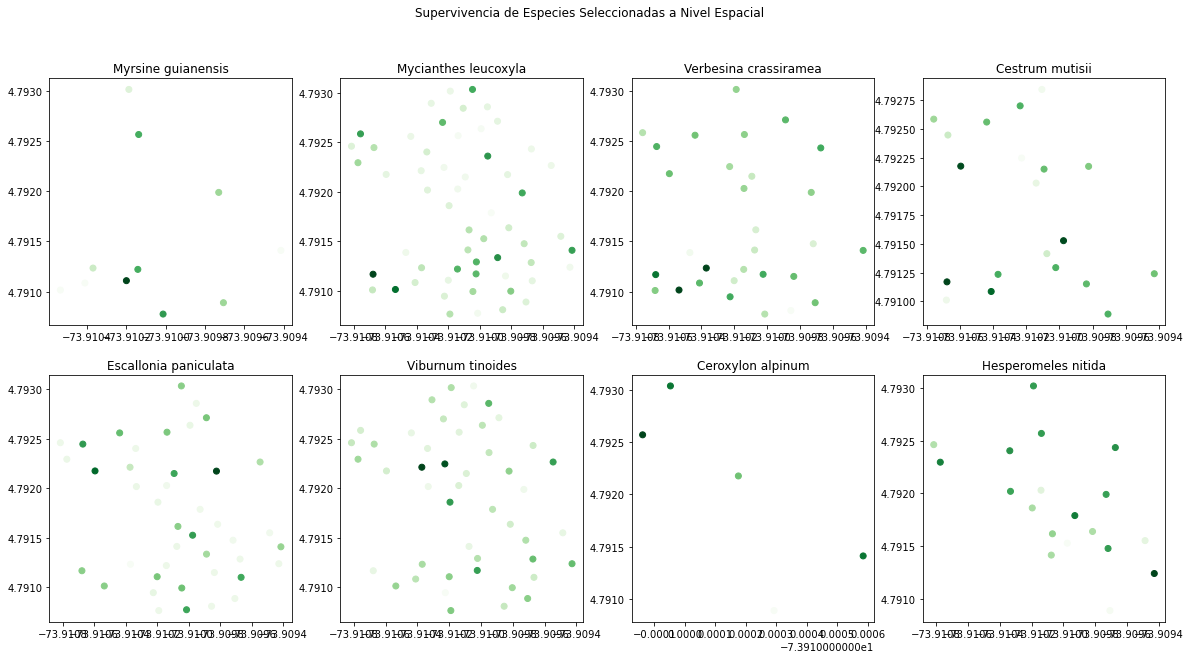

In [115]:
fig, axs = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Supervivencia de las Especies con Mayor Supervivencia a Nivel Espacial')
nrow = 0
ncol = 0
for especie in msdict:
    data = msdict[especie].groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'

    plot = axs[nrow, ncol].scatter(x=x, y=y, data=data, c=data['Sup_Ind'].array, cmap='Greens')
    axs[nrow, ncol].set_title(especie)
    
    if ncol == 3:
        nrow +=1
        ncol = 0
    else:
        ncol +=1

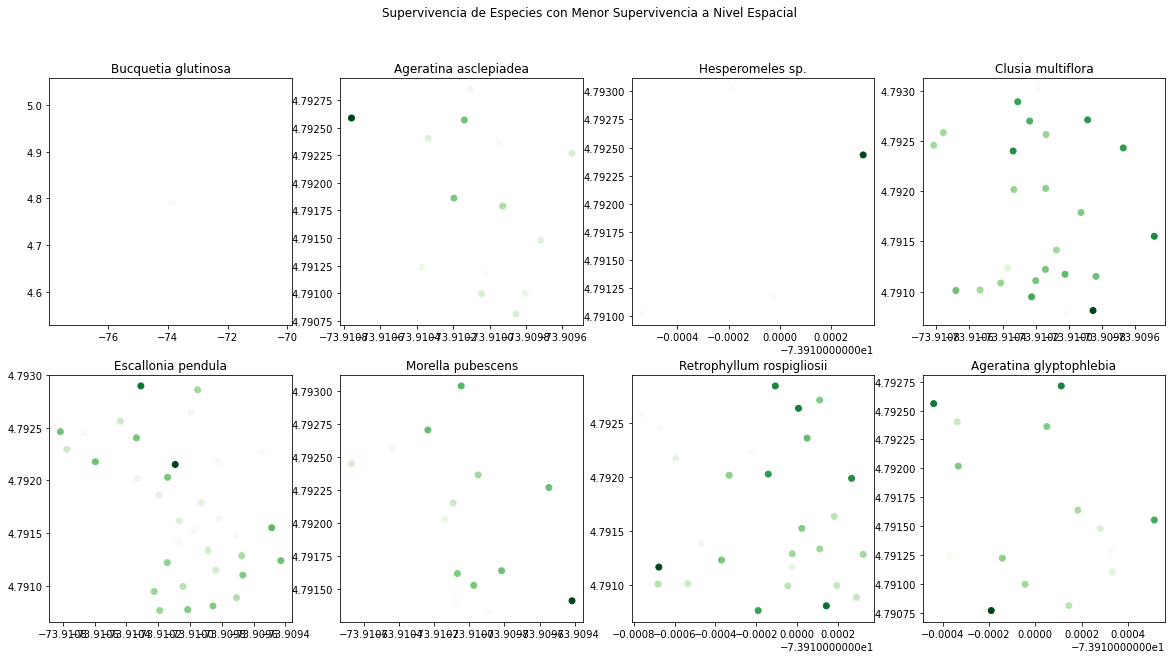

In [117]:
fig, axs = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Supervivencia de Especies con Menor Supervivencia a Nivel Espacial')
nrow = 0
ncol = 0
for especie in lsdict:
    data = lsdict[especie].groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'

    plot = axs[nrow, ncol].scatter(x=x, y=y, data=data, c=data['Sup_Ind'].array, cmap='Greens')
    axs[nrow, ncol].set_title(especie)
    
    if ncol == 3:
        nrow +=1
        ncol = 0
    else:
        ncol +=1

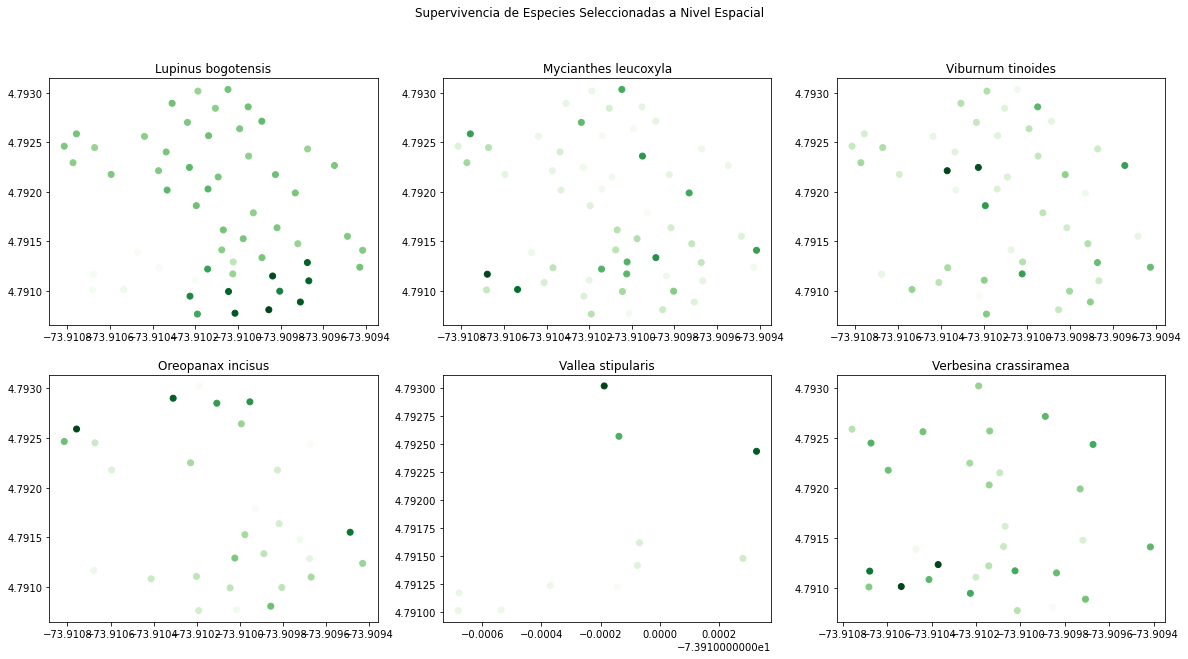

In [119]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Supervivencia de Especies Seleccionadas a Nivel Espacial')
nrow = 0
ncol = 0
for especie in isdict:
    data = isdict[especie].groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()
    x = 'COOR_ESTE'
    y = 'COOR_NORTE'

    plot = axs[nrow, ncol].scatter(x=x, y=y, data=data, c=data['Sup_Ind'].array, cmap='Greens')
    axs[nrow, ncol].set_title(especie)
    
    if ncol == 2:
        nrow +=1
        ncol = 0
    else:
        ncol +=1

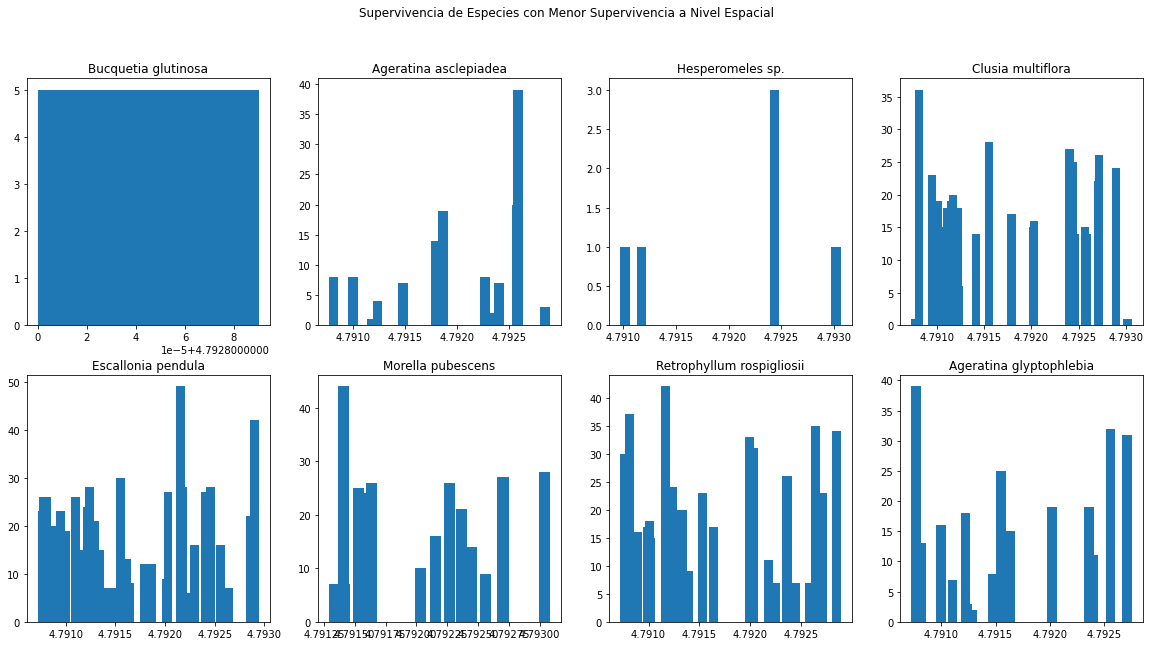

In [145]:
fig, axs = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Supervivencia de Especies con Menor Supervivencia a Nivel Espacial')
nrow = 0
ncol = 0
for especie in lsdict:
    data = lsdict[especie].groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()
    x = 'COOR_NORTE'


    plot = axs[nrow, ncol].bar(x=data[x], height=data['Sup_Ind'], width=0.00009)
    axs[nrow, ncol].set_title(especie)
    
    if ncol == 3:
        nrow +=1
        ncol = 0
    else:
        ncol +=1

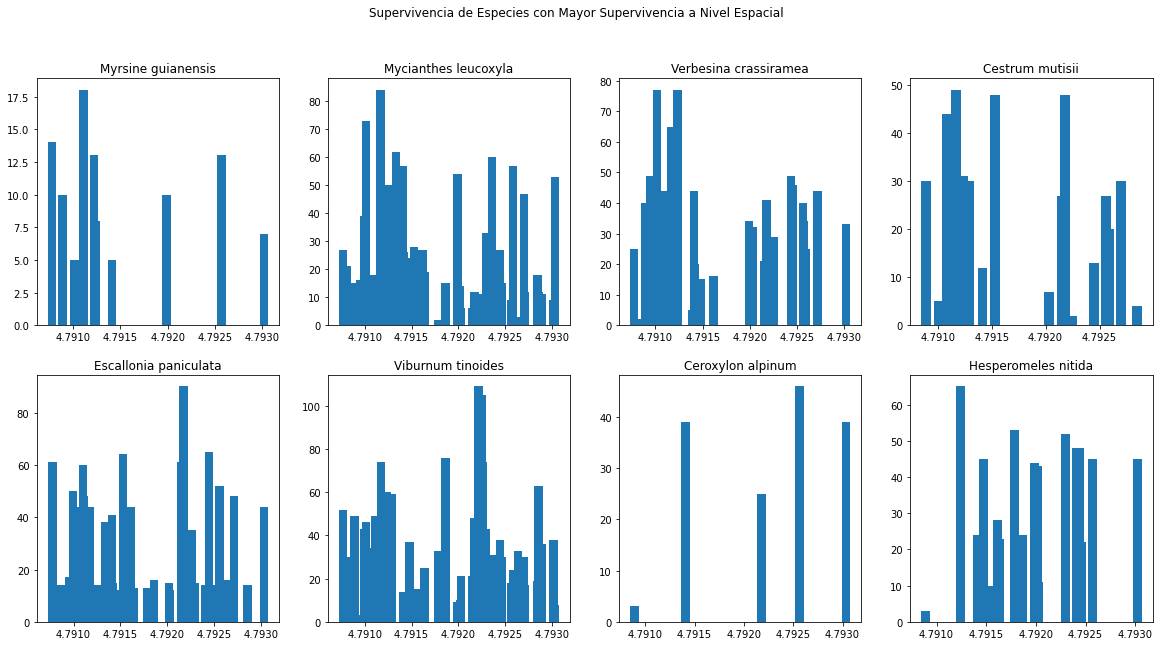

In [152]:
fig, axs = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Supervivencia de Especies con Mayor Supervivencia a Nivel Espacial')
nrow = 0
ncol = 0
for especie in msdict:
    data = msdict[especie].groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()
    x = 'COOR_NORTE'


    plot = axs[nrow, ncol].bar(x=data[x], height=data['Sup_Ind'], width=0.00009)
    axs[nrow, ncol].set_title(especie)
    
    if ncol == 3:
        nrow +=1
        ncol = 0
    else:
        ncol +=1

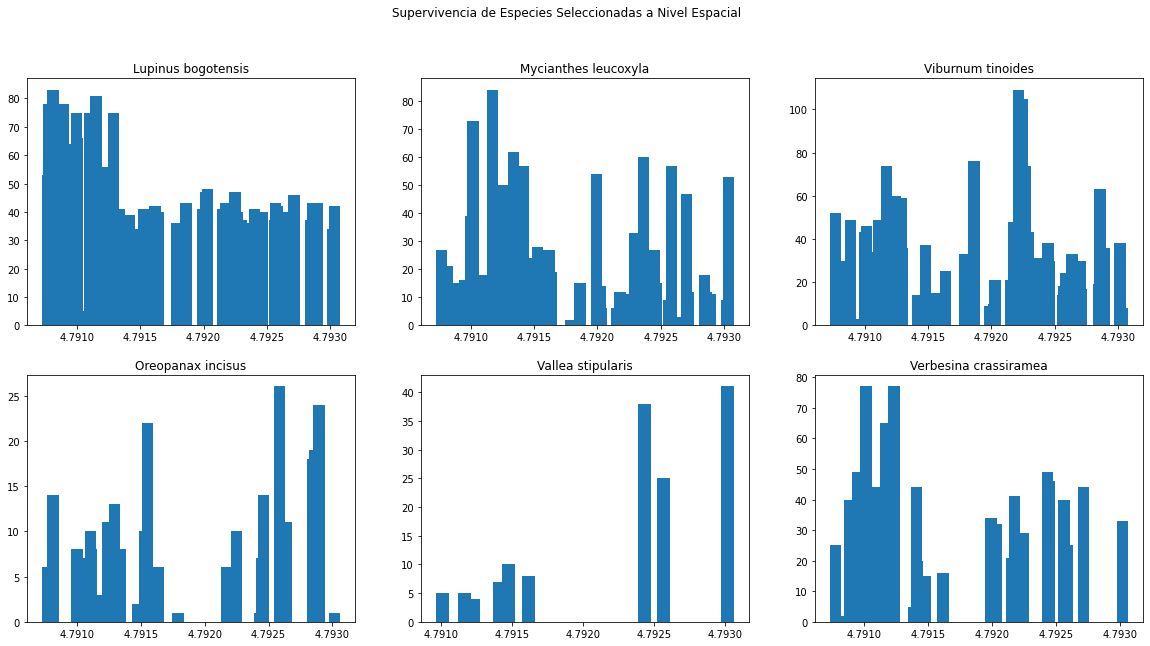

In [151]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Supervivencia de Especies Seleccionadas a Nivel Espacial')
nrow = 0
ncol = 0
for especie in isdict:
    data = isdict[especie].groupby(['COOR_ESTE', 'COOR_NORTE'])['Sup_Ind'].sum().reset_index()
    x = 'COOR_NORTE'


    plot = axs[nrow, ncol].bar(x=data[x], height=data['Sup_Ind'], width=0.00009)
    axs[nrow, ncol].set_title(especie)
    
    if ncol == 2:
        nrow +=1
        ncol = 0
    else:
        ncol +=1